Back to the [README](./README.md)

Back to the [previous notebook](./02-making-hypotheses.ipynb)

--------------------

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from setup import Col, Palette

In [12]:
df = pd.read_csv('data/preprocessed.csv')

--------------------

# Superficial Insight

In this notebook, we will create some simple plots that allow us
to look deeper into the structure of the data and what happens in
there.  We will be able to come to some quick conclusion to some
of the questions in the [hypotheses notebook](./02-making-hypotheses.ipynb),
while others will need deeper insight.

The `seaborn` package provides us with a powerful tool to inspect correlations
at a glance and produce qualitative statements.  And identifying qualitative
and quantitative columns as we did in the [setup notebook](./01-setup.ipynb)
empowers us even more since we can quickly produce informative graphs.

First, the quantitative columns of our dataset are `age`, `bmi` and `charges`.
Before anything else, let us take a look on their correlations:

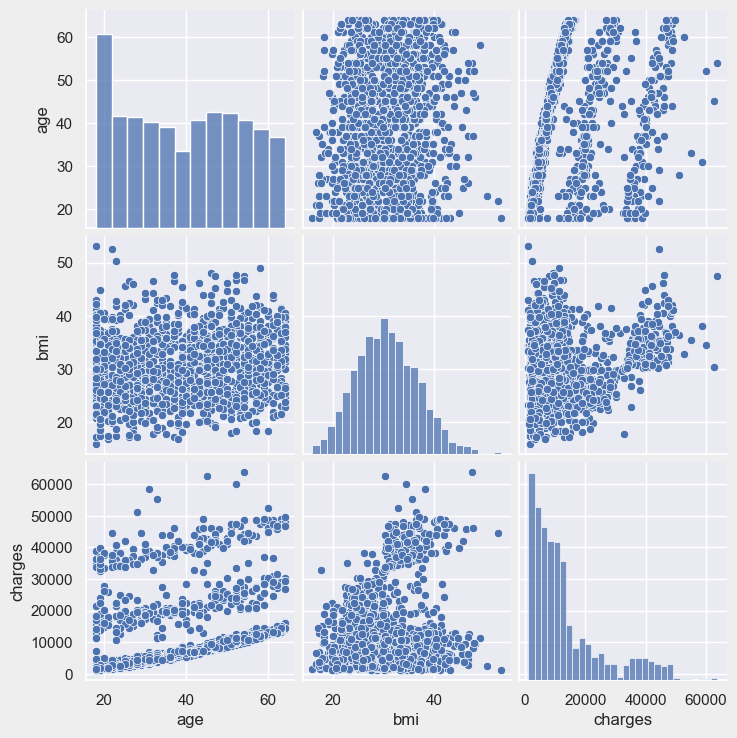

In [13]:
sns.pairplot(data=df[[Col.age, Col.bmi, Col.charges]])
plt.show()

By looking just at this graphic, we can immediately derive some expectations for our hypotheses.

For instance, we will not only find a relation between the age and the insurance charges, but
we will might also find some deeper correlations with other features of the dataset or even a
formula that could give an estimate.

As for the relation between the age and the BMI, we see the assumption confirmed that there
is no evidence for a connection to be found here.

And considering a connection between the charges and the BMI, there seems to be some sort of
clustering going on.  But it is hard to detect any details just yet.

With `sex`, `children`, `smoker` and `region` as categorical features, we can try to look a bit
deeper into those relations with a line of code very similar to the one above:

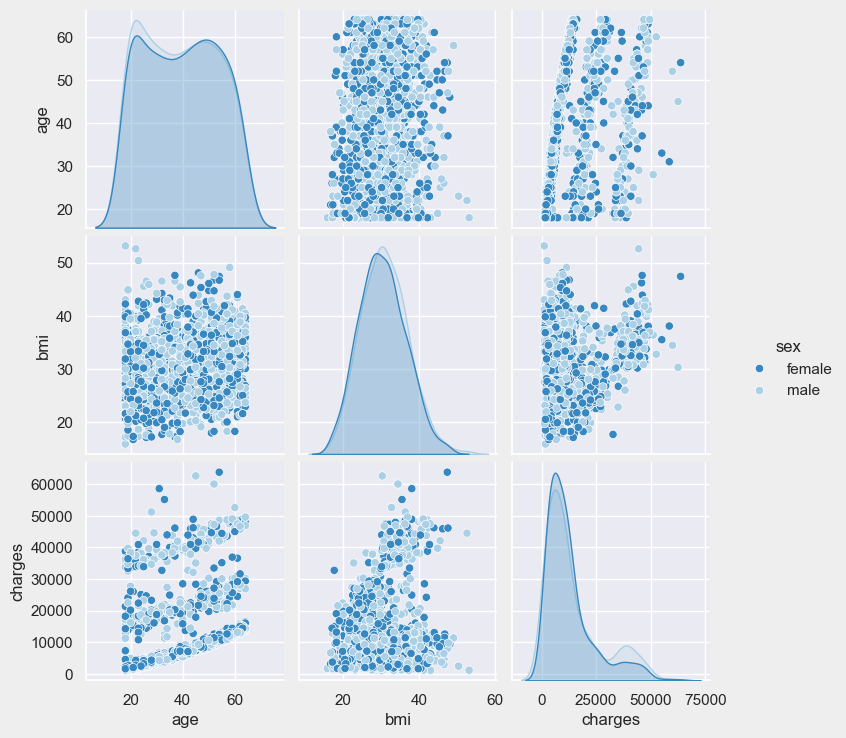

In [14]:
sns.pairplot(data=df[[Col.sex, Col.age, Col.bmi, Col.charges]], hue=Col.sex, palette=Palette.bl + '_r')
plt.show()

Regarding the assumption that the sex would have an impact on the charges, this does seem to be true
as one can easily guess by looking at the lower right graph.  There is a quite a difference in the
overlap between both groups.  However, the expectation that it would be the females who cause higher
charges appears to be false!  To solidify this observation further, let us look at this graphic:

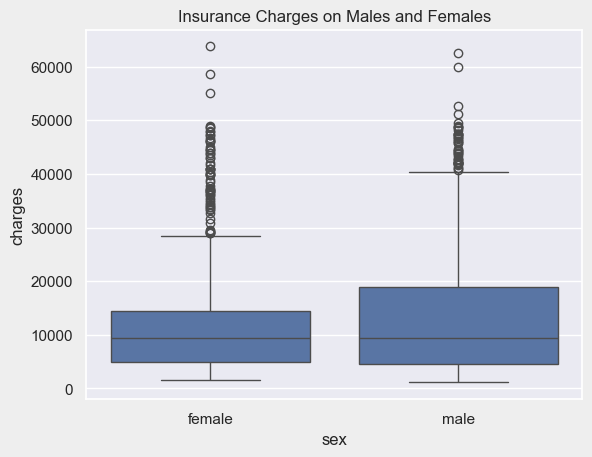

In [15]:
sns.boxplot(data=df, x=Col.sex, y=Col.charges)
plt.title('Insurance Charges on Males and Females')
plt.show()

In [16]:
# Get the numbers on those plots
df.groupby(Col.sex).charges.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


Apparently, males cause roughly 1,400$ higher charges than females on average.  With respect
to the standard deviation, however, this difference is of no statistical significance.  The
conclusion to the second question thus has to be that:

> __Conclusion to Question 2__<br/>
> The *null hypothesis* is *false*, the *alternative hypothesis* holds:<br/>
> *Females do not cause higher charges on average.*

Looking back at the `pairplot`, a few more smaller observations can be made:
Whereas males and females are quite evenly represented in the dataset, their ages are not.
Up until ca. 45, there are more males to be found than females.  The inverse is true
above that limit.  For completion but without further comment, let us look at the numbers:

In [17]:
df.groupby(Col.sex).age.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,39.503021,14.054223,18.0,27.0,40.0,51.75,64.0
male,676.0,38.917160,14.050141,18.0,26.0,39.0,51.00,64.0


We can also see a slight shift in the BMI distribution between both
sexes.  This confirms our expectation that we would find a difference between them here,
although this has not been chosen to be a hypothesis to discuss.
Again, just for completion but without further comment, here are the quick numbers:

In [18]:
df.groupby(Col.sex).bmi.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


Moving on, we look at the impact of children on the same data:

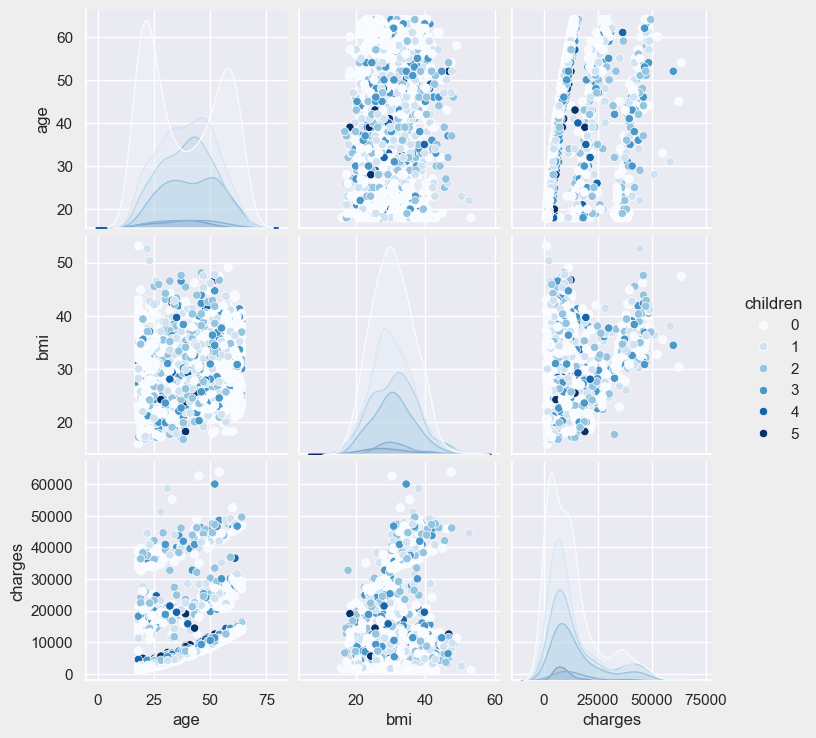

In [19]:
sns.pairplot(data=df[[Col.children, Col.age, Col.bmi, Col.charges]], hue=Col.children, palette=Palette.bl)
plt.show()

There is a lot to derive from this overview already!

First, looking at the top left graph, we can see that childless individuals concentrate
on both ends of the covered age spectrum (around the 20s and the 60s).  The individuals
that are reported to have at least one child seem to be located roughly within those
boundaries.  On top of that, about the same amount of people between (again, roughly) 35
and 45 years of age seem to have no child, or one or two children.
Individuals with three children are represented in the dataset by a significant amount as
well, but as soon as a child count of four or higher is encountered, the numbers shrink
substantially.  Thus, for further analysis, we could put them into one category with the
former in order to keep their information, but not unnecessarily put focus on them in
particular.

The next observation ties into the first one as well:  while there still is no obvious
corelation between the age and the BMI, the age distribution for the childless individuals
is reflected in their densities in the age-BMI diagrams, as they dominate the aforementioned
outer age ranges.

As for the age-related charges, it's clear to see that individuals without children
are present on all three levels, but they make the lower spectrum of each.  It is noticeable,
though, that the most expensive cases are connected to childless individuals.

Next, one could spot some more structure in the graphs illustrating the relation between
the insurance charges and the BMI.  It is not clear to see (yet), but there could be some
linearities between them.

And finally, looking at the lower right graph, by observing that the brighter lines
(correlating to none or few children) expose a more dynamic curve (a notable second bump
for higher charges), could hint that there is also a relation to be found there.  In order
to observe that deeper, however, one would need to look at the relative distribution since
childless individuals way outnumber any of the ones with children. 

What we can do at this point, however, is to come to a conclusion to the fourth question
from the [hypotheses notebook](./02-making-hypotheses.ipynb):

> __Conclusion to Question 4__<br/>
> The *null hypothesis holds*!<br/>
> *There is an influence of the number of children on the charges.*

Alright let us move on with a look at the effect of smoking on the data:

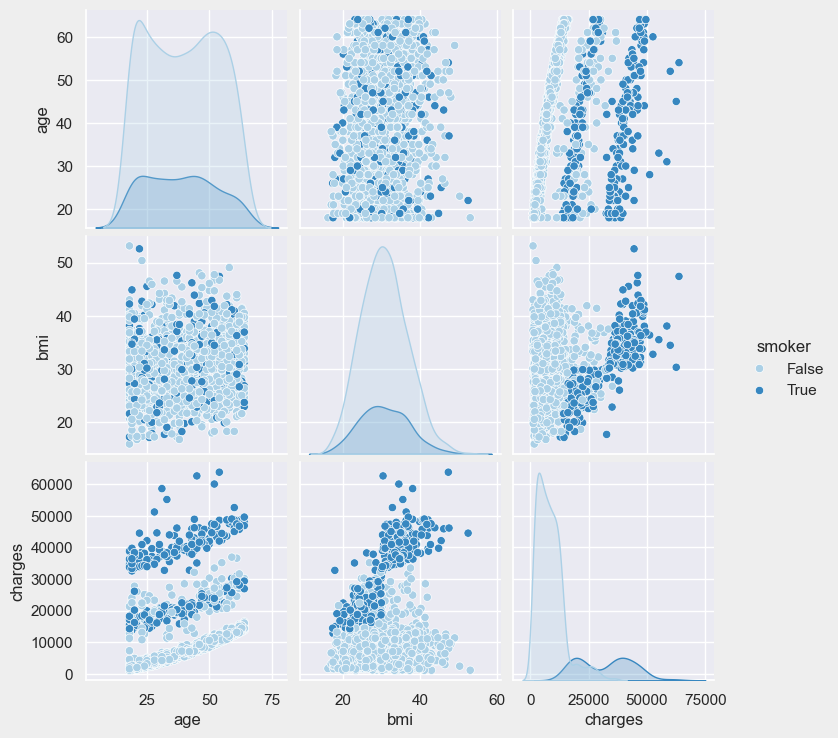

In [20]:
sns.pairplot(data=df[[Col.smoker, Col.age, Col.bmi, Col.charges]], hue=Col.smoker, palette=Palette.bl)
plt.show()

This tells us a lot, again.  With respect to the remaining hypotheses to cover, smoking
habits do impact the charges significantly!  Looking at the bottom left and right graphics,
they basically seem to be the defining factors for the different charge levels that we
discovered earlier, although the BMI separates the smokers further into two separate groups,
leading to the three levels we were able to make out in the charges-age relationship.
This is what we will look into deeper in the next notebook; for now, let us stick to the
superficial observations and finish our overview.

First, we can consider questions one, three and five answered:

> __Conclusion to Question 1__<br/>
> The *null hypothesis holds*!<br/>
> *There is a relation between the age and the insurance charges.*

> __Conclusion to Question 3__<br/>
> The *null hypothesis holds*!<br/>
> *There is a relation between the BMI and the charges.*

> __Conclusion to Question 5__<br/>
> The *null hypothesis holds*!<br/>
> *There is an influence of the smoking habits on the charges.*

Second, there are a few smaller observations to be made on the graph:
Although we already know that we have more non-smokers than smokers in
our dataset from the data frame's descriptive statistics, we see that
their age distribution appears to have a trend towards a lower and a
higher age level, which is less pronounced for the smokers.  However,
this may very well relate to the fact that our data set's overall
age distribution is biased already.  One could dig a bit deeper by
comparing the relative numbers rather than the absolute counts...

Anyway, although not exactly clear, one may argue to spot a hint
towards the smoking habits also affecting the BMI in general.  This
doesn't come as a surprise, but in order to show this reliably one
would prepare the data differently and maybe choose a different way
of displaying it.

Finally, we have the `region` to consider in our graphics:

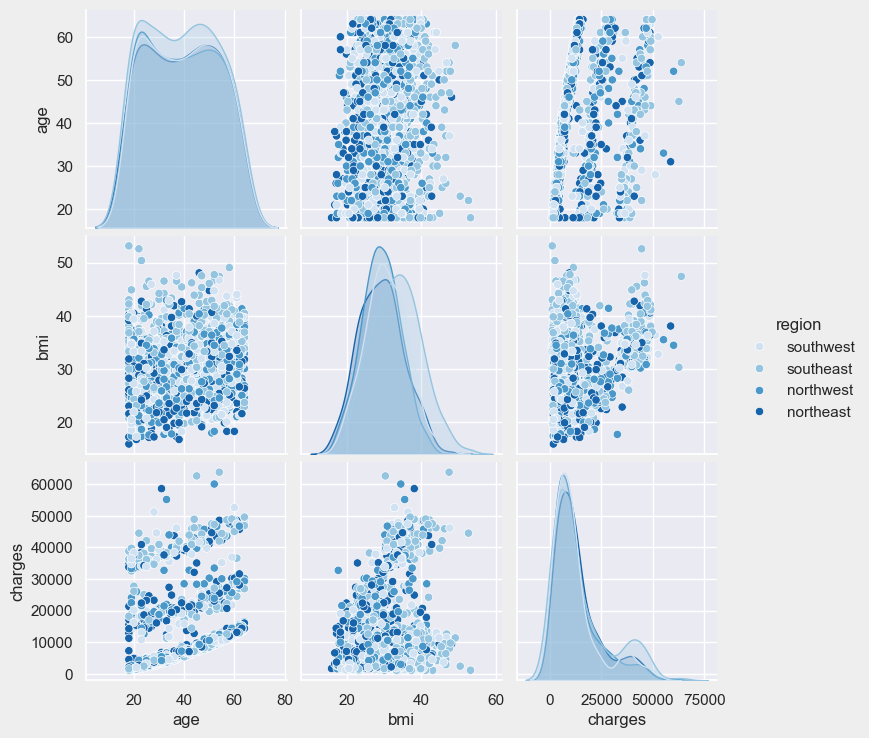

In [21]:
sns.pairplot(data=df[[Col.region, Col.age, Col.bmi, Col.charges]], hue=Col.region, palette=Palette.bl)
plt.show()

What we can see here is that the data behaves very similar in all four regions, independent
of what relation one looks at in particular.  There are some shifts or modulations going on
here and there, but given what we observed so far, those could relate to an overlap with other
influence factors and not actually relate to the region at all.

One detail stands out, though:  the BMI distribution of the dataset as a whole seems to be
notably tied to the region.  But again, this observation leaves the frame that has been set
for this project's exercise goals.

# Summary

With simple tools, all of our hypotheses from the former notebook have been investigated.
One null hypothesis turned out to be false, the other ones true.

We could leave it at that, but instead we will investigate the nature of the
correlation between the charges and the age with respect to other influence
factors a bit deeper.  We will start off by trying to isolate data points belonging
to the lowest charge group, then discerning the nature of the correlation,
and trying to find a regression for this subset in the next notebooks.

The isolation part begins [here](./04-isolating-df_low.ipynb).

--------------------

Back to the [README](./README.md)

To the [next notebook](./04-isolating-df_low.ipynb)